In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import txt file to csv file

In [2]:
raw_data = pd.read_csv('/Users/juntao/Downloads/data.txt', sep='|')

In [3]:
raw_data.head()

,AP,variable,value
0,0,score,65
1,1,score,98
2,2,score,85
3,3,score,83
4,4,score,115


Rename the variable and its data type.

In [4]:
score = raw_data[raw_data['variable'] == 'score']
score['value'] = score['value'].astype('int')
score.reset_index(drop=True, inplace=True)

<ipython-input-4-7b4a7d8e4b22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['value'] = score['value'].astype('int')


In [5]:
i = raw_data[raw_data['variable'] == 'i']
i['value'] = i['value'].str.strip("\'").astype('float')
i.reset_index(drop=True, inplace=True)

<ipython-input-5-edecb3036012>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['value'] = i['value'].str.strip("\'").astype('float')


In [6]:
a = raw_data[raw_data['variable'] == 'a']
a['value'] = a['value'].str.strip("\'").astype('int')
a.reset_index(drop=True, inplace=True)

<ipython-input-6-da4d2826f350>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['value'] = a['value'].str.strip("\'").astype('int')


In [7]:
h = raw_data[raw_data['variable'] == 'h']
h['value'] = h['value'].str.strip("\'").astype('int')
h.reset_index(drop=True, inplace=True)

<ipython-input-7-c91fc387520e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h['value'] = h['value'].str.strip("\'").astype('int')


In [8]:
h['value'].value_counts() 

1    341
0     93
Name: value, dtype: int64

Most of the mothers have completed high school.

In [9]:
w = raw_data[raw_data['variable'] == 'w']
w['value'] = w['value'].str.strip("\'").astype('int')
w.reset_index(drop=True, inplace=True)

<ipython-input-9-cf0a91190eca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w['value'] = w['value'].str.strip("\'").astype('int')


In [10]:
w['value'].value_counts() 

4    205
2     96
1     77
3     56
Name: value, dtype: int64

Nearly 50% of mom worked full time in first year of child's life. 20% of mom worked second or third year of child's life. Only less than 20% of mom did not worked in the first three year of child's life. I do not think OneHotEncoder is necessary in this case because higher number means more work experience (there is a rank in it).

In [11]:
data=pd.concat({'Score':score['value'],'IQ':i['value'], 'Work':w['value'], 'Age':a['value'], 'HighSchool':h['value']} ,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Score       434 non-null    int64  
 1   IQ          434 non-null    float64
 2   Work        434 non-null    int64  
 3   Age         434 non-null    int64  
 4   HighSchool  434 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 17.1 KB


Exploratory analysis

In [12]:
data.describe()

,Score,IQ,Work,Age,HighSchool
count,434.000000,434.000000,434.000000,434.000000,434.000000
mean,86.797235,100.000000,2.896313,22.785714,0.785714
std,20.410688,15.000000,1.181394,2.701070,0.410799
min,20.000000,71.037405,1.000000,17.000000,0.000000
25%,74.000000,88.660321,2.000000,21.000000,1.000000
50%,90.000000,97.915254,3.000000,23.000000,1.000000
75%,102.000000,110.272742,4.000000,25.000000,1.000000
max,144.000000,138.893106,4.000000,29.000000,1.000000


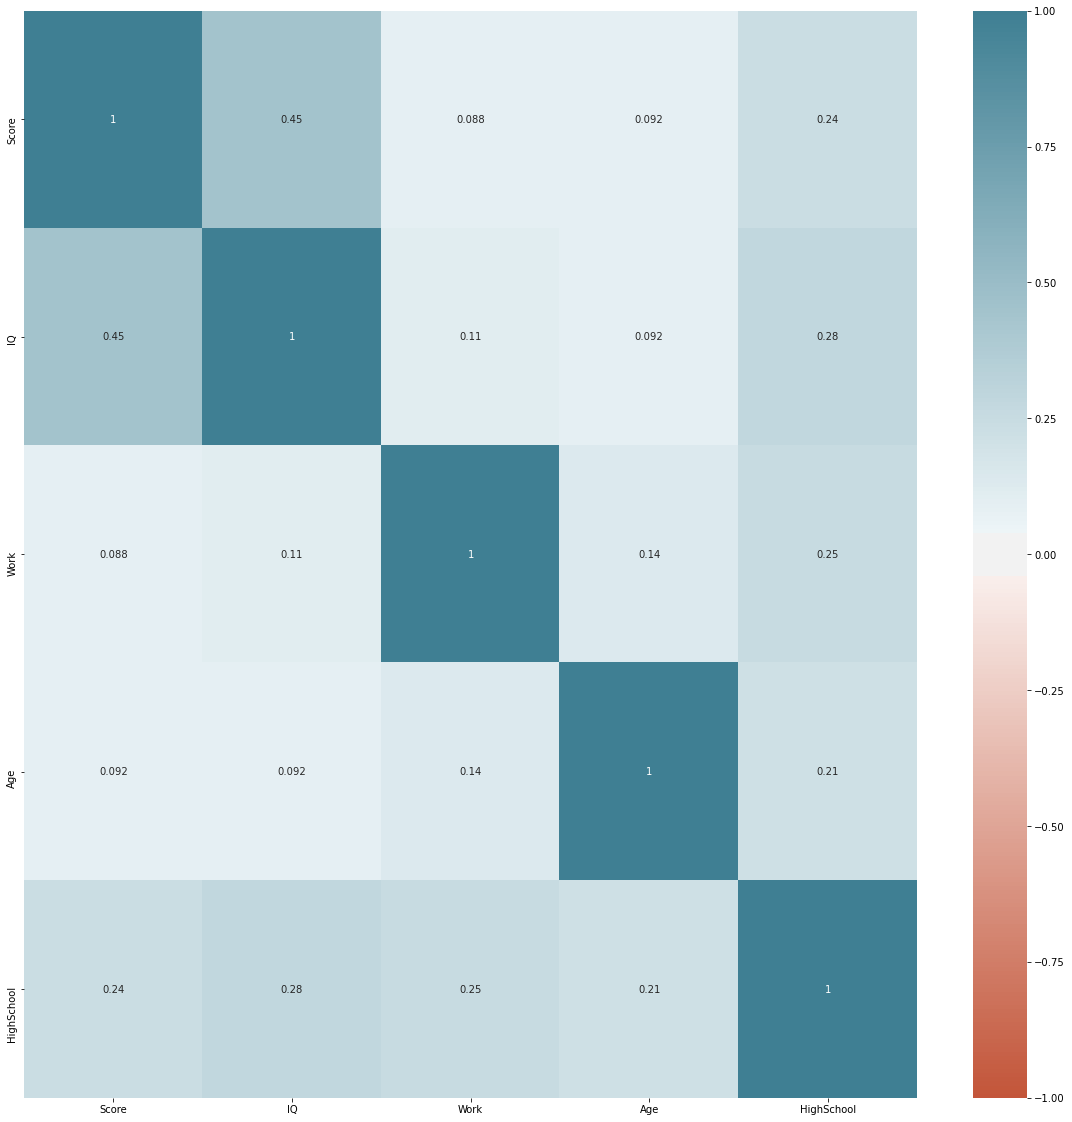

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

Based on my observation from the correlation graph above, Score is highly correlated IQ and HighSchool and they have a darker blue color. Whereas work and age has lighter blue color with Score. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6a7be9550>,
      dtype=object)

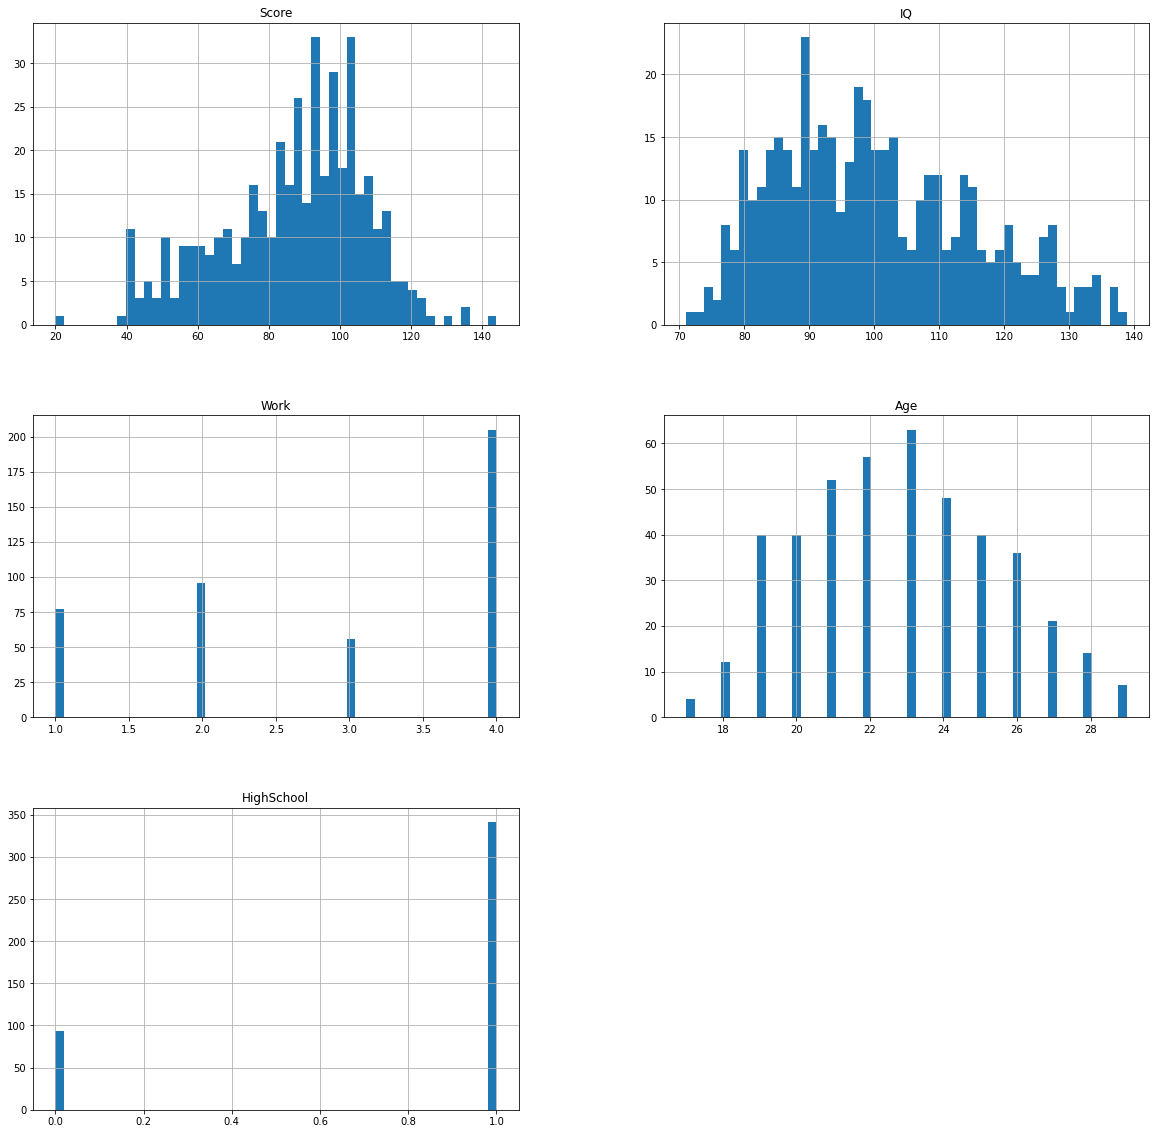

In [14]:
data.hist(figsize = (20,20),bins = 50)
#we have messy data with slightly different scales

In [15]:
#Also, take a look at the missing values！
for col in data:
    if data[col].isna().sum()>0:
        print(col,data[col].isna().sum())

There is no missing value in this dataset

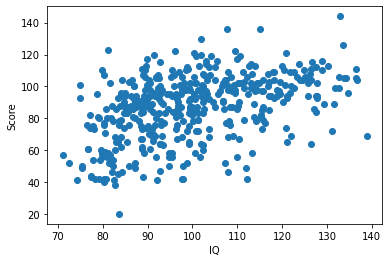

In [16]:
x1=data['IQ'].values
y=data['Score'].values
plt.scatter(x1, y)
plt.xlabel("IQ")
plt.ylabel("Score")
plt.show()

In [17]:
High_School_completed = data[data['HighSchool'] == 1].mean()
High_School_imcompleted = data[data['HighSchool'] == 0].mean()
print(High_School_completed,High_School_imcompleted )

Score          89.319648
IQ            102.212049
Work            3.052786
Age            23.087977
HighSchool      1.000000
dtype: float64 Score         77.548387
IQ            91.889152
Work           2.322581
Age           21.677419
HighSchool     0.000000
dtype: float64


On avergae, we see that if mother completed high school, then their child on average has higher score. High school completion on average is also associated with higher IQ and more work experience and higher age. 

In [18]:
data['AgeBand'] = pd.cut(data['Age'], 3)
data[['AgeBand', 'Score']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Score
0,"(16.988, 21.0]",84.608108
1,"(21.0, 25.0]",87.134615
2,"(25.0, 29.0]",90.051282


Higher age correspondes to higher average score. 

In [19]:
work1 = data[data['Work'] == 1].mean()
work2 = data[data['Work'] == 2].mean()
work3= data[data['Work'] == 3].mean()
work4 = data[data['Work'] == 4].mean()

<ipython-input-19-74411c9fecf5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  work1 = data[data['Work'] == 1].mean()
<ipython-input-19-74411c9fecf5>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  work2 = data[data['Work'] == 2].mean()
<ipython-input-19-74411c9fecf5>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  work3= data[data['Work'] == 3].mean()
<ipython-input-19-74411c9fecf5>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') i

In [20]:
print('mother did not work in first three years of child’s life', work1['Score'])
print('mother worked in second or third year of child’s life', work2['Score'])
print('mother worked part-time in first year of child’s life', work3['Score'])
print('mother worked full-time in first year of child’s life', work4['Score'])

mother did not work in first three years of child’s life 82.0
mother worked in second or third year of child’s life 85.85416666666667
mother worked part-time in first year of child’s life 93.5
mother worked full-time in first year of child’s life 87.20975609756097


On averge, mother who did not work in first 3 years of child's life has lower score than mother's who worked in the first three years. 

let's do standardization! 

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
raw_X = data[['Age', 'Work', 'HighSchool', 'IQ']]
cols = raw_X.columns
scaler.fit(raw_X)
X = scaler.transform(raw_X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6a6cf7a90>,
      dtype=object)

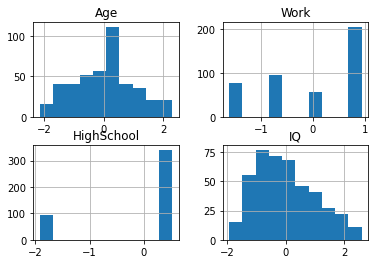

In [23]:
#convert X_train, X_test to dataframe because it would be easier for us to visualize
X = pd.DataFrame(X, columns = cols)
X.hist()

Building Model

In [24]:
X['Score'] = data['Score']

In [25]:
X

,Age,Work,HighSchool,IQ,Score
0,1.562029,0.935303,0.522233,1.409460,65
1,0.820727,0.935303,0.522233,-0.710026,98
2,1.562029,0.935303,0.522233,1.030732,85
3,0.820727,0.087868,0.522233,-0.036733,83
4,1.562029,0.935303,0.522233,-0.484177,115
...,...,...,...,...,...
429,-0.661877,0.935303,-1.914854,-1.009336,94
430,0.079425,0.935303,0.522233,-0.467847,76
431,0.450076,-0.759567,-1.914854,-0.343082,50
432,-0.661877,-0.759567,0.522233,-0.209800,88


Start building a single factor model

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model1 = smf.ols(formula='Score ~ IQ', data=X).fit()
model2 = smf.ols(formula='Score ~ Age', data=X).fit()
model3 = smf.ols(formula='Score ~ Work', data=X).fit()
model4 = smf.ols(formula='Score ~ HighSchool', data=X).fit()
model1.summary()

/Users/juntao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/juntao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           7.66e-23
Time:                        18:05:09   Log-Likelihood:                -1875.6
No. Observations:                 434   AIC:                             3755.
Df Residuals:                     432   BIC:                             3763.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.7972      0.877     98.993      0.000      85.074      88.521
IQ             9.1391      0.877     10.423      0.000       7.416      10.862
==============================================================================
Omnibus:                        7.545   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.735
Skew:                          -0.324   Prob(JB):                       0.0209
Kurtosis:                       2.919   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model1 explains about 20% of change in score. Since we have a very small p-value. The coefficient is significant. And then holding all else constant, given one unit change in IQ will result a change in 9.1391 in Score. 

In [27]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.688
Date:                Sun, 22 Jan 2023   Prob (F-statistic):             0.0555
Time:                        18:05:09   Log-Likelihood:                -1922.4
No. Observations:                 434   AIC:                             3849.
Df Residuals:                     432   BIC:                             3857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.7972      0.977     88.866      0.000      84.878      88.717
Age            1.8756      0.977      1.920      0.055      -0.044       3.795
==============================================================================
Omnibus:                       14.813   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.823
Skew:                          -0.463   Prob(JB):                     0.000366
Kurtosis:                       2.871   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model2 is not as good as model1 in that its R-squared is much lower than R-Squared in Model1. The coefficient of Age is insignificant under 95% confidence interval.

In [28]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.335
Date:                Sun, 22 Jan 2023   Prob (F-statistic):             0.0685
Time:                        18:05:09   Log-Likelihood:                -1922.6
No. Observations:                 434   AIC:                             3849.
Df Residuals:                     432   BIC:                             3857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.7972      0.977     88.830      0.000      84.877      88.718
Work           1.7844      0.977      1.826      0.069      -0.136       3.705
==============================================================================
Omnibus:                       13.911   Durbin-Watson:                   1.467
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.738
Skew:                          -0.442   Prob(JB):                     0.000630
Kurtosis:                       2.819   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Similar to Model2, Model3 is not good as well because it also has a very small R-Squared. Plus Model2 and Model3 has larger AIC score and BIC score than Model1. 

In [29]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     25.69
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           5.96e-07
Time:                        18:05:09   Log-Likelihood:                -1911.8
No. Observations:                 434   AIC:                             3828.
Df Residuals:                     432   BIC:                             3836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.7972      0.953     91.082      0.000      84.924      88.670
HighSchool     4.8301      0.953      5.069      0.000       2.957       6.703
==============================================================================
Omnibus:                       11.077   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.316
Skew:                          -0.373   Prob(JB):                      0.00349
Kurtosis:                       2.738   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model4 is slightly better than Model2 and Model3 in that its R-squared has increased, but still not as good as Model1. Holding all else constant, 1 unit increase in HighSchool result in a 4.83 unit increase in Score.
If I can only keep 1 single factor model, I would keep model1.

Moving on to multiple predictors model

In [30]:
model5 = smf.ols(formula='Score ~ IQ + Age + Work + HighSchool', data=X).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     29.38
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           1.31e-21
Time:                        18:05:09   Log-Likelihood:                -1871.7
No. Observations:                 434   AIC:                             3753.
Df Residuals:                     429   BIC:                             3774.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.7972      0.872     99.530      0.000      85.083      88.511
IQ             8.4215      0.911      9.249      0.000       6.632      10.211
Age            0.5932      0.897      0.662      0.509      -1.169       2.355
Work           0.1578      0.906      0.174      0.862      -1.623       1.938
HighSchool     2.2819      0.949      2.404      0.017       0.416       4.148
==============================================================================
Omnibus:                        7.277   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.480
Skew:                          -0.313   Prob(JB):                       0.0238
Kurtosis:                       2.851   Cond. No.                         1.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model5 explains 21% of change in Score. Under 95% confidence interval, IQ and Work has significant coefficient. Age and Work has insignificant coefficient. I will start from removing the least significant predictor, which is work.

In [31]:
model6 = smf.ols(formula='Score ~ IQ + Age + HighSchool', data=X).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     39.25
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           1.94e-22
Time:                        18:05:09   Log-Likelihood:                -1871.8
No. Observations:                 434   AIC:                             3752.
Df Residuals:                     430   BIC:                             3768.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.7972      0.871     99.643      0.000      85.085      88.509
IQ             8.4284      0.909      9.276      0.000       6.643      10.214
Age            0.6064      0.892      0.680      0.497      -1.148       2.360
HighSchool     2.3172      0.926      2.501      0.013       0.496       4.138
==============================================================================
Omnibus:                        7.243   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                7.444
Skew:                          -0.312   Prob(JB):                       0.0242
Kurtosis:                       2.852   Cond. No.                         1.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

And then removing Age.

In [32]:
model7 = smf.ols(formula='Score ~ IQ + HighSchool', data=X).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     58.72
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           2.79e-23
Time:                        18:05:09   Log-Likelihood:                -1872.0
No. Observations:                 434   AIC:                             3750.
Df Residuals:                     431   BIC:                             3762.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.7972      0.871     99.705      0.000      85.086      88.508
IQ             8.4488      0.908      9.309      0.000       6.665      10.233
HighSchool     2.4415      0.908      2.690      0.007       0.658       4.225
==============================================================================
Omnibus:                        7.327   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.530
Skew:                          -0.313   Prob(JB):                       0.0232
Kurtosis:                       2.845   Cond. No.                         1.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model7 explains 21.4% change in Score, whereas Model1 explains 20.1% change in Score. Holding all else constant, 1 unit change in IQ leads to 8.45 unit increase in score. Completion in HighSchool leads to 2.44 unit increase in score. 

I'll also add interaction terms in my model. Starting from the most complex model. 

In [33]:
model8 = smf.ols(formula='Score ~ IQ + Age + Work + HighSchool + IQ*Age + IQ*Work + IQ*HighSchool + Age*Work + Age*HighSchool + Work*HighSchool', data=X).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     13.70
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           5.68e-21
Time:                        18:05:09   Log-Likelihood:                -1863.4
No. Observations:                 434   AIC:                             3749.
Df Residuals:                     423   BIC:                             3794.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          87.4257      0.955     91.579      0.000      85.549      89.302
IQ                  8.7197      0.925      9.422      0.000       6.901      10.539
Age                 0.9722      0.899      1.082      0.280      -0.795       2.739
Work               -0.0370      0.899     -0.041      0.967      -1.804       1.730
HighSchool          1.2934      1.132      1.142      0.254      -0.932       3.519
IQ:Age             -0.8377      0.917     -0.914      0.361      -2.639       0.964
IQ:Work            -0.7054      0.929     -0.759      0.448      -2.531       1.121
IQ:HighSchool      -2.2652      1.088     -2.082      0.038      -4.404      -0.127
Age:Work            1.3131      0.933      1.407      0.160      -0.521       3.148
Age:HighSchool      1.2473      0.960      1.299      0.195      -0.640       3.135
Work:HighSchool    -1.0868      0.913     -1.190      0.235      -2.881       0.708
==============================================================================
Omnibus:                        7.177   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                7.375
Skew:                          -0.312   Prob(JB):                       0.0250
Kurtosis:                       2.863   Cond. No.                         2.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our R-Squared has improved to 24.5%. Age, Work, HighSchool, IQ*Age, IQ*Work, Age*Work, Age*HighSchool, and Work*HighSchool are insignificant. I will start from removing the most insignificant predictors. 

In [34]:
model9 = smf.ols(formula='Score ~ IQ + Age + Work + HighSchool  + IQ*HighSchool + Age*Work  + Work*HighSchool', data=X).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     19.18
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           2.68e-22
Time:                        18:05:09   Log-Likelihood:                -1864.8
No. Observations:                 434   AIC:                             3746.
Df Residuals:                     426   BIC:                             3778.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          87.7132      0.933     94.019      0.000      85.879      89.547
IQ                  8.7458      0.908      9.633      0.000       6.961      10.530
Age                 0.8836      0.894      0.989      0.323      -0.873       2.640
Work                0.0234      0.898      0.026      0.979      -1.741       1.788
HighSchool          0.7080      1.068      0.663      0.508      -1.391       2.807
IQ:HighSchool      -2.8793      1.011     -2.848      0.005      -4.866      -0.892
Age:Work            1.5241      0.879      1.734      0.084      -0.204       3.252
Work:HighSchool    -1.2152      0.868     -1.400      0.162      -2.922       0.491
==============================================================================
Omnibus:                        6.540   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.703
Skew:                          -0.295   Prob(JB):                       0.0350
Kurtosis:                       2.846   Cond. No.                         2.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The result is Model9, which has, so far, the highest Adjusted R-Squared and the lowest AIC/BIC score. 

Conclusion: Mother's IQ is a dominant predictor in explaining a child's IQ score. Completion of high school also matters to a child's IQ score, but it may because mother with high IQ are more likely to finish high school. Work experience and Age doesn't matter that much.